<a href="https://colab.research.google.com/github/Aniruddha-data/END_Program/blob/main/Sentiment_Analysis_using_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis using Naive Bayes

In this assignment, we will attempt to label tweets with sentiments (positive, neutral and negative) using Naive Bayes classifier. Naive Bayes is a very basic approach to this problem, but gives surprisingly good accuracy sometimes.

**Fill in the Blanks**

## Importing required libraries

In [33]:
import pandas as pd
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

## Reading dataset

In [9]:
data=pd.read_csv('tweets.csv')
data.drop(data.columns[0],axis=1,inplace=True)
data.head()

,tweets,labels
0,Obama has called the GOP budget social Darwini...,1
1,"In his teen years, Obama has been known to use...",0
2,IPA Congratulates President Barack Obama for L...,0
3,RT @Professor_Why: #WhatsRomneyHiding - his co...,0
4,RT @wardollarshome: Obama has approved more ta...,1


## Text processing for the tweets

In [10]:
import nltk 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 

stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])
    
def processTweet(tweet):
    # tweet is the text we will pass for preprocessing 
    # convert passed tweet to lower case 
    #--Fill--
    tweet=tweet.lower()
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
    
    # use work_tokenize imported above to tokenize the tweet
    #--Fill--
    word_token = word_tokenize(tweet)
    return [word for word in word_token if word not in stopwords]
    #return [word for word in tweet]

In [ ]:
#data['tweets'] = data['tweets'].astype('string')

In [12]:
data.isnull().sum()

tweets    5
labels    0
dtype: int64

In [13]:
import numpy as np
data = data.replace(np.nan, '', regex=True)

In [ ]:
#data.dropna(inplace=True)

In [14]:
data.isnull().sum()

tweets    0
labels    0
dtype: int64

## Process all tweets

In [15]:
processed=[]

for tweet in data['tweets']:
    
    # process all tweets using processTweet function above - store in variable 'cleaned' 
    cleaned=processTweet(tweet)
    processed.append(' '.join(cleaned))

In [16]:
data['processed'] = processed

In [17]:
data.head()

,tweets,labels,processed
0,Obama has called the GOP budget social Darwini...,1,obama called gop budget social darwinism nice ...
1,"In his teen years, Obama has been known to use...",0,teen years obama known use marijuana cocaine
2,IPA Congratulates President Barack Obama for L...,0,ipa congratulates president barack obama leade...
3,RT @Professor_Why: #WhatsRomneyHiding - his co...,0,rt whatsromneyhiding connection supporters cri...
4,RT @wardollarshome: Obama has approved more ta...,1,rt obama approved targeted assassinations mode...


## Create pipeline and define parameters for GridSearch

In [18]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

## Split data into test and train

In [19]:
# split data into train and test with split as 0.2 
X = data.processed
y = data.labels

#--Fill--

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Perform classification (using GridSearch)

In [20]:
# perform GridSearch CV with 10 fold CV using pipeline and tuned_paramters defined above 
#clf = --Fill--
from pprint import pprint
from time import time
import logging
from sklearn.model_selection import GridSearchCV
clf= GridSearchCV(text_clf, tuned_parameters, 
                    cv=10,verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in text_clf.steps])
print("parameters:")
pprint(tuned_parameters)
t0 = time()
clf.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % clf.best_score_)
print("Best parameters set:")
best_parameters = clf.best_estimator_.get_params()
for param_name in sorted(tuned_parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
#clf.fit(x_train, y_train)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': [1, 0.1, 0.01],
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__ngram_range': [(1, 1), (1, 2), (2, 2)]}
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


done in 10.933s

Best score: 0.840
Best parameters set:
	clf__alpha: 0.1
	tfidf__norm: 'l2'
	tfidf__use_idf: False
	vect__ngram_range: (1, 2)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   10.9s finished


## Classification report 

In [21]:
# print classification report after predicting on test set with best model obtained in GridSearch
#--Fill--

# printing the optimal accuracy score and hyperparameters
#print('We can get accuracy of',clf.best_score_,'using',clf.best_params_)

# model with the best hyperparameters
#nb = MultinomialNB(alpha=0.1)
# predict
predictions = clf.best_estimator_.predict(x_test)
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       188
           1       0.75      0.63      0.68        70
           2       0.62      0.28      0.38        18

    accuracy                           0.82       276
   macro avg       0.74      0.61      0.65       276
weighted avg       0.80      0.82      0.80       276



In [22]:
clf.best_estimator_.score(x_train, y_train)

0.9909420289855072

In [23]:
clf.best_estimator_.score(x_test, y_test)

0.8152173913043478

## Important:

In [24]:
counts = data.labels.value_counts()
print(counts)

0    947
1    352
2     81
Name: labels, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweets     1380 non-null   object
 1   labels     1380 non-null   int64 
 2   processed  1380 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.5+ KB


In [25]:

print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2)))

Before OverSampling, counts of label '0': 759
Before OverSampling, counts of label '1': 282 

Before OverSampling, counts of label '2': 63 



In [26]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_test == 0))) 
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_test == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_test == 2)))

Before OverSampling, counts of label '0': 188
Before OverSampling, counts of label '1': 70 

Before OverSampling, counts of label '2': 18 



In [27]:
# Class count
count_class_0, count_class_1,count_class_2 = data.labels.value_counts()

# Divide by class
df_class_0 = data[data['labels'] == 0]
df_class_1 = data[data['labels'] == 1]
df_class_2 = data[data['labels'] == 2]

Random over-sampling:
1    947
2    947
0    947
Name: labels, dtype: int64


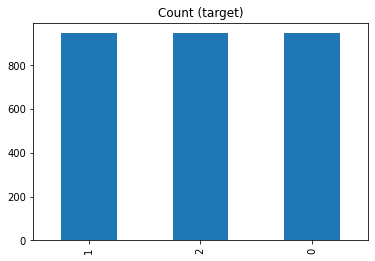

In [28]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_2_over = df_class_2.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over,df_class_2_over], axis=0)

print('Random over-sampling:')
print(df_test_over.labels.value_counts())

df_test_over.labels.value_counts().plot(kind='bar', title='Count (target)');

In [29]:
# split data into train and test with split as 0.2 
X = df_test_over.processed
y = df_test_over.labels

#--Fill--

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# perform GridSearch CV with 10 fold CV using pipeline and tuned_paramters defined above 
#clf = --Fill--
from pprint import pprint
from time import time
import logging
from sklearn.model_selection import GridSearchCV
clf= GridSearchCV(text_clf, tuned_parameters, 
                    cv=10,verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in text_clf.steps])
print("parameters:")
pprint(tuned_parameters)
t0 = time()
clf.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % clf.best_score_)
print("Best parameters set:")
best_parameters = clf.best_estimator_.get_params()
for param_name in sorted(tuned_parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
#clf.fit(x_train, y_train)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': [1, 0.1, 0.01],
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__ngram_range': [(1, 1), (1, 2), (2, 2)]}
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


done in 17.827s

Best score: 0.926
Best parameters set:
	clf__alpha: 0.01
	tfidf__norm: 'l2'
	tfidf__use_idf: False
	vect__ngram_range: (1, 2)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   17.8s finished


In [31]:
# print classification report after predicting on test set with best model obtained in GridSearch
#--Fill--

# printing the optimal accuracy score and hyperparameters
#print('We can get accuracy of',clf.best_score_,'using',clf.best_params_)

# model with the best hyperparameters
#nb = MultinomialNB(alpha=0.1)
# predict
predictions = clf.best_estimator_.predict(x_test)
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       195
           1       0.92      0.94      0.93       194
           2       0.94      1.00      0.97       180

    accuracy                           0.93       569
   macro avg       0.94      0.94      0.94       569
weighted avg       0.94      0.93      0.93       569



In [32]:
print(clf.best_estimator_.score(x_train, y_train))
print(clf.best_estimator_.score(x_test, y_test))

0.9889964788732394
0.9349736379613357


We can see above that the class distribution is highly imbalanced, this would not lead to good sampling of the data for the classifier. For your learning, try using [SMOTE](https://imbalanced-learn.readthedocs.io/en/stable/api.html) to oversample the minority classes and then evaluate the performance with Naive Bayes and compare.